<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [28]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [29]:
from bs4 import BeautifulSoup
import requests
df = pd.read_csv("data/job_listings.csv", index_col=0)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [30]:
df['description'] = df['description'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [31]:
df['description']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
5      b'Create various Business Intelligence Analyti...
6      b'As Spotify Premium swells to over 96M subscr...
7      b"Everytown for Gun Safety, the nation's large...
8      b"MS in a quantitative discipline such as Stat...
9      b'Slack is hiring experienced data scientists ...
10     b'Who We Are\nBlackThorn Therapeutics is a com...
11     b'Part-timeAbout The Opportunity\nHere at Grub...
12     b"nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...
13     b'As Spotify Premium swells to over 96M subscr...
14     b'Experience with guiding R&D strategy for you...
15     b'The Atlantic is seeking a Data Scientist to ...
16     b'THE CHALLENGE\nEventbrite is big, bustling m...
17     b'ContractWe are looking

In [32]:
df['description'] = df['description'].str[1:]

In [33]:
df['description']

0      "Job Requirements:\nConceptual understanding i...
1      'Job Description\n\nAs a Data Scientist 1, you...
2      'As a Data Scientist you will be working on co...
3      '$4,969 - $6,756 a monthContractUnder the gene...
4      'Location: USA \xe2\x80\x93 multiple locations...
5      'Create various Business Intelligence Analytic...
6      'As Spotify Premium swells to over 96M subscri...
7      "Everytown for Gun Safety, the nation's larges...
8      "MS in a quantitative discipline such as Stati...
9      'Slack is hiring experienced data scientists t...
10     'Who We Are\nBlackThorn Therapeutics is a comp...
11     'Part-timeAbout The Opportunity\nHere at Grubh...
12     "nfosys\xe2\x80\x93 Data & Analytics \xe2\x80\...
13     'As Spotify Premium swells to over 96M subscri...
14     'Experience with guiding R&D strategy for your...
15     'The Atlantic is seeking a Data Scientist to h...
16     'THE CHALLENGE\nEventbrite is big, bustling ma...
17     'ContractWe are looking 

In [34]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

df = standardize_text(df, "description")

In [35]:
df.head()

,description,title
0,job requirements nconceptual understanding i...,Data scientist
1,job description n nas a data scientist 1 you...,Data Scientist I
2,as a data scientist you will be working on co...,Data Scientist - Entry Level
3,4 969 6 756 a monthcontractunder the gene...,Data Scientist
4,location usa xe2 x80 x93 multiple locations...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [36]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [37]:
STOP_WORDS = nlp.Defaults.stop_words.union(["it's","a","b","c",])

In [38]:
# Tokenizer Pipe

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df["description"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['token'] = tokens

In [39]:
df.head()

,description,title,token
0,job requirements nconceptual understanding i...,Data scientist,"[job, requirements, nconceptual, understanding..."
1,job description n nas a data scientist 1 you...,Data Scientist I,"[job, description, n, nas, data, scientist, 1,..."
2,as a data scientist you will be working on co...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,4 969 6 756 a monthcontractunder the gene...,Data Scientist,"[4, 969, 6, 756, monthcontractunder, general, ..."
4,location usa xe2 x80 x93 multiple locations...,Data Scientist,"[location, usa, xe2, x80, x93, multiple, locat..."


In [40]:
df['token']

0      [job, requirements, nconceptual, understanding...
1      [job, description, n, nas, data, scientist, 1,...
2      [data, scientist, working, consulting, busines...
3      [4, 969, 6, 756, monthcontractunder, general, ...
4      [location, usa, xe2, x80, x93, multiple, locat...
5      [create, business, intelligence, analytical, r...
6      [spotify, premium, swells, 96m, subscribers, g...
7      [everytown, gun, safety, nation, s, largest, g...
8      [ms, quantitative, discipline, statistics, mat...
9      [slack, hiring, experienced, data, scientists,...
10     [nblackthorn, therapeutics, computational, sci...
11     [timeabout, opportunity, nhere, grubhub, xe2, ...
12     [nfosys, xe2, x80, x93, data, analytics, xe2, ...
13     [spotify, premium, swells, 96m, subscribers, g...
14     [experience, guiding, r, d, strategy, organiza...
15     [atlantic, seeking, data, scientist, help, lea...
16     [challenge, neventbrite, big, bustling, market...
17     [contractwe, looking, hi

### Inspecting our dataset a little more

In [14]:
all_words = [word for tokens in df['token'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df['token']]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

144286 words total, with a vocabulary size of 9800
Max sentence length is 1762


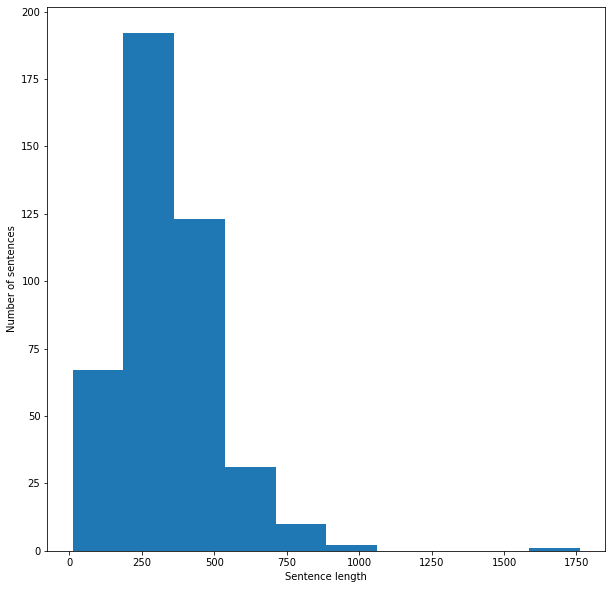

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [16]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

# lemmatize
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for listing in df['token']:
    lemmas = [lemmatizer.lemmatize(word) for word in listing]
    lemmatized_tokens.append(lemmas)

[nltk_data] Downloading package wordnet to /Users/julie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', lowercase=True, max_features=100)

counts = []
#Learn our Vocab
for i in lemmatized_tokens:
    vect.fit(i)
    counts.append(vect.vocabulary_)


In [18]:
counts[0]

{'job': 24,
 'requirement': 61,
 'nconceptual': 42,
 'understanding': 75,
 'machine': 32,
 'learning': 27,
 'model': 38,
 'like': 29,
 'nai': 40,
 'xc2': 79,
 'xa8ve': 78,
 'bayes': 3,
 'mean': 37,
 'svm': 71,
 'apriori': 1,
 'linear': 30,
 'logistic': 31,
 'regression': 60,
 'neural': 43,
 'random': 59,
 'forest': 17,
 'decision': 9,
 'tree': 74,
 'nn': 49,
 'hand': 21,
 'experience': 13,
 'nintermediate': 46,
 'expert': 14,
 'level': 28,
 'coding': 5,
 'skill': 66,
 'python': 57,
 'ability': 0,
 'write': 77,
 'function': 18,
 'clean': 4,
 'efficient': 12,
 'data': 8,
 'manipulation': 34,
 'mandatory': 33,
 'role': 62,
 'nexposure': 44,
 'package': 52,
 'numpy': 51,
 'scipy': 64,
 'panda': 53,
 'matplotlib': 36,
 'ggplot2': 19,
 'dplyr': 11,
 'tidyr': 73,
 'nability': 39,
 'communicate': 6,
 'finding': 16,
 'technical': 72,
 'non': 50,
 'stake': 69,
 'holder': 23,
 'nhands': 45,
 'sql': 68,
 'hive': 22,
 'similar': 65,
 'programming': 55,
 'language': 26,
 'nmust': 48,
 'past': 54,
 '

## 4) Visualize the most common word counts

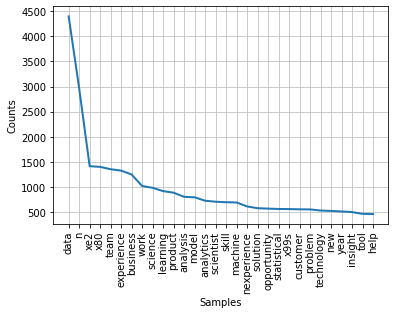

In [19]:
from nltk.probability import FreqDist
all_jobs = []
for j in lemmatized_tokens:
    for w in j:
        all_jobs.append(w.lower())
fdist = FreqDist(all_jobs)

fdist.plot(30, cumulative=False)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [20]:
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1,2))

jobs_input = []
for l in lemmatized_tokens:
    s = ''
    for w in l:
        if w not in STOP_WORDS:
            s += ' ' + w
    jobs_input.append(s)

feature_matrix = tfidf.fit_transform(jobs_input)
# Get feature names to use as dataframe column headers
feature_names = tfidf.get_feature_names()

# View Feature Matrix as DataFrame
df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
df.head()

,ability,advanced,algorithm,analysis,analytical,analytics,based,build,building,business,...,understanding,work,working,world,x80,x80 x99s,x99s,xe2,xe2 x80,year
0,0.198660,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.223732,0.139837,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.054675,0.000000,0.059341,0.040584,0.057594,0.000000,0.0,0.057088,0.0,0.039709,...,0.061575,0.076972,0.100154,0.10722,0.326256,0.096268,0.096268,0.325463,0.326256,0.040782
2,0.000000,0.177215,0.168108,0.000000,0.163158,0.136360,0.0,0.161725,0.0,0.337474,...,0.000000,0.109027,0.141864,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.291550,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154472
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.336107,0.0,0.000000,0.0,0.277275,...,0.000000,0.000000,0.000000,0.00000,0.284770,0.000000,0.000000,0.284078,0.284770,0.284770


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [46]:
df['token'] = df['token'].astype(str)

In [47]:
vect.fit(df['token'])
dtm = vect.transform(df['token'])

In [48]:
print(vect.get_feature_names())

['ability', 'advanced', 'algorithms', 'analysis', 'analytical', 'analytics', 'based', 'best', 'build', 'building', 'business', 'communication', 'company', 'complex', 'computer', 'customer', 'customers', 'data', 'degree', 'design', 'develop', 'development', 'digital', 'drive', 'driven', 'employment', 'engineering', 'environment', 'experience', 'field', 'help', 'impact', 'improve', 'including', 'industry', 'information', 'insights', 'knowledge', 'large', 'learning', 'looking', 'machine', 'management', 'marketing', 'methods', 'modeling', 'models', 'new', 'nexperience', 'nthe', 'nwe', 'nyou', 'opportunities', 'opportunity', 'people', 'position', 'predictive', 'problems', 'product', 'products', 'projects', 'python', 'qualifications', 'quantitative', 'related', 'required', 'requirements', 'research', 'results', 'role', 'science', 'scientist', 'scientists', 'services', 'sets', 'skills', 'software', 'solutions', 'sql', 'statistical', 'statistics', 'status', 'support', 'systems', 'team', 'teams

In [49]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [50]:
dtm

,ability,advanced,algorithms,analysis,analytical,analytics,based,best,build,building,...,tools,understanding,use,work,working,world,x80,x99s,xe2,years
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,1,1,0,0,2,1,0,...,1,1,0,2,2,2,8,2,8,0
2,0,1,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
5,0,0,3,2,2,1,1,0,1,0,...,2,0,0,0,0,0,0,0,0,0
6,0,1,0,3,1,1,0,0,0,1,...,1,0,0,4,2,2,3,1,3,0
7,2,1,0,7,1,0,1,1,0,0,...,0,0,1,2,1,0,0,0,0,1
8,1,0,0,1,2,0,0,0,2,1,...,1,0,0,1,1,0,1,0,1,1
9,1,0,0,2,0,0,0,2,1,0,...,0,4,3,6,0,1,4,2,4,1


In [51]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [52]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 5.09901951, 5.19615242, 5.47722558, 5.65685425]]),
 array([[  0,   4, 114,  56, 159]]))

In [53]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[ 0.        , 21.81742423, 21.81742423, 21.9544984 , 21.9544984 ]]),
 array([[256,  66,  27, 193,  60]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 